### IMPORT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 2E3D-90D7

 Directory of C:\Users\LENOVO\Desktop\indian startup

08/09/2025  01:47 PM    <DIR>          .
08/07/2025  08:00 PM    <DIR>          ..
08/06/2025  06:45 PM    <DIR>          .ipynb_checkpoints
08/09/2025  01:48 PM             6,682 app.py
08/06/2025  06:27 PM           122,812 archive (2).zip
08/07/2025  11:41 PM           366,771 startfile_cleaned
08/09/2025  01:40 PM           350,580 startfile_cleaned.csv
08/06/2025  06:44 PM           425,801 startup_funding.csv
08/09/2025  01:47 PM            62,136 startup1.ipynb
               6 File(s)      1,334,782 bytes
               3 Dir(s)  160,374,906,880 bytes free


### PREPROCESSING

In [3]:
df=pd.read_csv("startup_funding.csv")

In [4]:
df['Startup Name'].unique().tolist()#converts to a unique list from series of data to use in sliding button as selectbox in sidebar

['BYJU’S',
 'Shuttl',
 'Mamaearth',
 'https://www.wealthbucket.in/',
 'Fashor',
 'Pando',
 'Zomato',
 'Ecozen',
 'CarDekho',
 'Dhruva Space',
 'Rivigo',
 'Healthians',
 'Licious',
 'InCred',
 'Trell',
 'Rein Games',
 'Lenskart.com',
 'Freshworks',
 'Misters',
 'Sunstone Eduversity Pvt. Ltd',
 'Burger Singh',
 'Ninjacart',
 'Aye Finance',
 'SuperGaming',
 'Clumio',
 'eBikeGo',
 'Digital Mall Asia',
 'Medikabazaar',
 'Vogo Automotive',
 'Furtados School of Music',
 'Paytm',
 'Dunzo',
 'Udaan',
 'The Man Company',
 'FPL Technologies',
 'Cashflo',
 'Digital F5',
 '3rdFlix',
 '75F',
 'Myelin Foundry',
 'Atomberg Technology',
 'GOQii',
 'Vyapar App',
 'Progcap',
 'MyPetrolPump',
 'Alteria Capital',
 'Pine Labs',
 'Meesho',
 'Cars24',
 'Uniphore',
 'Zendrive',
 'Lo! Foods',
 'Tala',
 'INDwealth',
 'HungerBox',
 'AdmitKard',
 'Mishry Reviews',
 'Grofers',
 'Rapido Bike Taxi',
 'RenewBuy',
 'Atlan',
 'WizCounsel',
 'Ola Cabs',
 'Daalchini Technologies',
 '"BYJU\\\\\'S"',
 'Moglix',
 'Ezyhaul',


In [5]:
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


#### COLUMN NAME CHANGING

In [6]:
df.set_index('Sr No',inplace=True)

In [7]:
df.rename(columns={'Date dd/mm/yyyy':'Date','Startup Name':'Startup','Investor Name':'investor','InvestmentnType':'investment type','Amount in USD':'Amount cr','City  Location':'city','Industry Vertical':'type'},inplace=True)

In [8]:
df.columns

Index(['Date', 'Startup', 'type', 'SubVertical', 'city', 'Investors Name',
       'investment type', 'Amount cr', 'Remarks'],
      dtype='object')

In [9]:
(df.isnull().sum()/df.shape[0])*100

Date                0.000000
Startup             0.000000
type                5.617608
SubVertical        30.749014
city                5.913272
Investors Name      0.788436
investment type     0.131406
Amount cr          31.537451
Remarks            86.235217
dtype: float64

In [10]:
df.drop(['Remarks'],axis=1,inplace=True)

In [11]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [12]:
df.index.name='SN'

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1292 non-null   datetime64[ns]
 1   Startup          3044 non-null   object        
 2   type             2873 non-null   object        
 3   SubVertical      2108 non-null   object        
 4   city             2864 non-null   object        
 5   Investors Name   3020 non-null   object        
 6   investment type  3040 non-null   object        
 7   Amount cr        2084 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 214.0+ KB


In [14]:
(df.isnull().sum()/df.shape[0])*100

Date               57.555848
Startup             0.000000
type                5.617608
SubVertical        30.749014
city                5.913272
Investors Name      0.788436
investment type     0.131406
Amount cr          31.537451
dtype: float64

In [15]:
df['Amount cr']=df['Amount cr'].fillna('0')

In [16]:
df['SubVertical']=df['SubVertical'].fillna('Unknown')

In [17]:
df

,Date,Startup,type,SubVertical,city,Investors Name,investment type,Amount cr
SN,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"
...,...,...,...,...,...,...,...,...
3040,NaT,Printvenue,NaN,Unknown,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000"
3041,NaT,Graphene,NaN,Unknown,NaN,KARSEMVEN Fund,Private Equity,"8,25,000"
3042,NaT,Mad Street Den,NaN,Unknown,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"


In [18]:
df=df.dropna(subset=['Startup','type','city','Investors Name'])

In [19]:
df.isnull().sum()

Date               1629
Startup               0
type                  0
SubVertical           0
city                  0
Investors Name        0
investment type       4
Amount cr             0
dtype: int64

In [20]:
df['Amount cr']=df['Amount cr'].str.replace(',','')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16480\2123001236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount cr']=df['Amount cr'].str.replace(',','')


In [141]:
def is_float(val):#function to convert to float from str
    try:
        float(val)
        return val
    except:
        return False

In [22]:
df['Amount cr']=df['Amount cr'].apply(is_float)
df['Amount cr']=df['Amount cr'].astype('float')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16480\1200429279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount cr']=df['Amount cr'].apply(is_float)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16480\1200429279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount cr']=df['Amount cr'].astype('float')


In [23]:
df

,Date,Startup,type,SubVertical,city,Investors Name,investment type,Amount cr
SN,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0
...,...,...,...,...,...,...,...,...
2869,NaT,Tracxn,Startup Analytics platform,Unknown,Bangalore,SAIF Partners,Private Equity,3500000.0
2870,NaT,Dazo,Mobile Food Ordering app,Unknown,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.0
2871,NaT,Tradelab,Financial Markets Software,Unknown,Bangalore,Rainmatter,Seed Funding,400000.0


In [24]:
def into_cr(val):
    rs=val*140
    return rs/10000000

In [25]:
df['Amount cr']=df.loc[:,'Amount cr'].apply(into_cr)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16480\3995480536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount cr']=df.loc[:,'Amount cr'].apply(into_cr)


In [26]:
df

,Date,Startup,type,SubVertical,city,Investors Name,investment type,Amount cr
SN,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,2800.000000
2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,112.677516
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,257.024040
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,42.000000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,25.200000
...,...,...,...,...,...,...,...,...
2869,NaT,Tracxn,Startup Analytics platform,Unknown,Bangalore,SAIF Partners,Private Equity,49.000000
2870,NaT,Dazo,Mobile Food Ordering app,Unknown,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000
2871,NaT,Tradelab,Financial Markets Software,Unknown,Bangalore,Rainmatter,Seed Funding,5.600000


##### For removing non needed string in startup column

In [27]:
import re

def remove_escapes(text):
    # Remove hex byte escapes
    return re.sub(r'(\\x[0-9a-fA-F]{2})+', '', text)

df['Startup'] = df['Startup'].apply(remove_escapes)



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16480\2515296018.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Startup'] = df['Startup'].apply(remove_escapes)


In [28]:
df.to_csv('startfile_cleaned.csv', index=False)#save the file in directory


In [29]:
df.isnull().sum()

Date               1629
Startup               0
type                  0
SubVertical           0
city                  0
Investors Name        0
investment type       4
Amount cr             0
dtype: int64

In [30]:
df

,Date,Startup,type,SubVertical,city,Investors Name,investment type,Amount cr
SN,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,2800.000000
2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,112.677516
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,257.024040
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,42.000000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,25.200000
...,...,...,...,...,...,...,...,...
2869,NaT,Tracxn,Startup Analytics platform,Unknown,Bangalore,SAIF Partners,Private Equity,49.000000
2870,NaT,Dazo,Mobile Food Ordering app,Unknown,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000
2871,NaT,Tradelab,Financial Markets Software,Unknown,Bangalore,Rainmatter,Seed Funding,5.600000


In [31]:
df['Investors Name'].unique().tolist()

['Tiger Global Management',
 'Susquehanna Growth Equity',
 'Sequoia Capital India',
 'Vinod Khatumal',
 'Sprout Venture Partners',
 'Chiratae Ventures',
 'Ant Financial',
 'Sathguru Catalyzer Advisors',
 'Ping An Global Voyager Fund',
 'Mumbai Angels, Ravikanth Reddy',
 'SAIF Partners, Spring Canter Investment Ltd.',
 'Paytm, NPTK, Sabre Partners and Neoplux',
 'Vertex Growth Fund',
 'Ruizheng Investment',
 'Manipal Education and Medical Group (MEMG)',
 'SoftBank Vision Fund',
 'Sequoia, CapitalG, Accel',
 'Sauce.vc, Rainforest Ventures',
 'Prime Venture Partners, LetsVenture, PS1 Venture and GlobalLogic co-founder Rajul Garg',
 'RB Investments',
 'DG Daiwa Ventures, DG Incubation',
 'Trifecta Capital Advisors',
 'FinTech',
 'Dream Incubator',
 'Altimeter Capital, Sutter Hill Ventures',
 'Startup Buddy',
 'Amour Infrastructure',
 'Ackermans & van Haaren, HealthQuad, Rebright Partners, Toppan Printing',
 'Matrix Partners, Stellaris Venture Partners, Kalaari Capital',
 'IAN Fund and DSG 

In [32]:
investor_list=set(sorted(df['Investors Name'].str.split(',').sum()))

In [33]:
il=list(investor_list)
il.remove('')

In [34]:


import re

def remove_escapes(text):
    # Remove hex byte escapes
    return re.sub(r'(\\x[0-9a-fA-F]{2})+', '', text)

df['Startup'] = df['Startup'].apply(remove_escapes)

df['Startup']=df['Startup'].str.replace("\\",'')
df['Startup']=df['Startup'].str.replace("'",'')
df['Startup']=df['Startup'].str.replace('"','')
df['Startup']=df['Startup'].str.replace('’','')
df['Startup']=df['Startup'].str.replace('.com','')
df['Startup']=df['Startup'].str.upper()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16480\62782463.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Startup'] = df['Startup'].apply(remove_escapes)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16480\62782463.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Startup']=df['Startup'].str.replace("\\",'')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16480\62782463.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [35]:
df.to_csv('startfile_cleaned.csv',index=False)

In [36]:
df

,Date,Startup,type,SubVertical,city,Investors Name,investment type,Amount cr
SN,,,,,,,,
1,2020-09-01,BYJUS,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,2800.000000
2,NaT,SHUTTL,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,112.677516
3,2020-09-01,MAMAEARTH,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,257.024040
4,2020-02-01,HTTPS://WWW.WEALTHBUCKET.IN/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,42.000000
5,2020-02-01,FASHOR,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,25.200000
...,...,...,...,...,...,...,...,...
2869,NaT,TRACXN,Startup Analytics platform,Unknown,Bangalore,SAIF Partners,Private Equity,49.000000
2870,NaT,DAZO,Mobile Food Ordering app,Unknown,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000
2871,NaT,TRADELAB,Financial Markets Software,Unknown,Bangalore,Rainmatter,Seed Funding,5.600000


### Data analysis for the dashboard and features in streamlit

### INVESTOR ANALYSIS

In [37]:
def investor_detail(name,n=len(df[df['Investors Name'].str.contains('SAIF Partners')])):
    investor_details=df[df['Investors Name'].str.contains('SAIF Partners')][['Startup','Date','type','city','Amount cr']].head(n)
    return investor_details

In [38]:
investor_detail('Vinod Khatumal',4)


,Startup,Date,type,city,Amount cr
SN,,,,,
11,RIVIGO,NaT,Technology,Gurgaon,280.0
37,CASHFLO,2019-04-09,FinTech,Mumbai,46.2
232,MEESHO,2018-07-06,Consumer Internet,Bengaluru,161.0
233,AYEFINANCE,2018-10-06,Finance,Gurugram,301.0


In [39]:
df[df['Investors Name'].str.contains('SAIF Partners')][['Startup','Date','type','city','Amount cr']].head(5)

,Startup,Date,type,city,Amount cr
SN,,,,,
11,RIVIGO,NaT,Technology,Gurgaon,280.0
37,CASHFLO,2019-04-09,FinTech,Mumbai,46.2
232,MEESHO,2018-07-06,Consumer Internet,Bengaluru,161.0
233,AYEFINANCE,2018-10-06,Finance,Gurugram,301.0
293,TRAVELTRIANGLE,2018-10-04,Consumer Internet,Gurugram,168.0


##### Graph plotting for the Investor according to the startups  having amount_cr invested which has highest

In [40]:
top_inv=(df[df['Investors Name'].str.contains('SAIF Partners')].groupby('Startup')['Amount cr'].sum().sort_values(ascending=False))

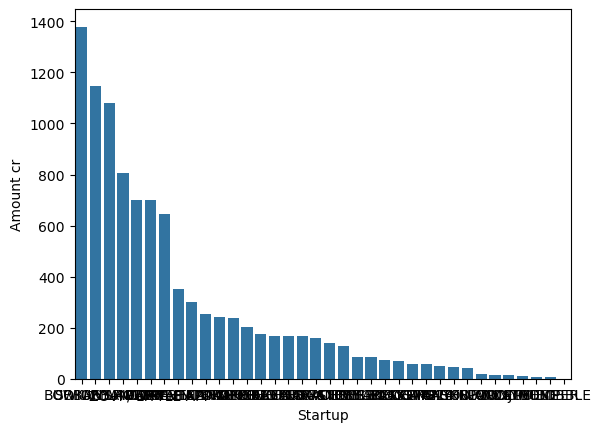

In [41]:
sns.barplot(data=top_inv)
plt.show()

##### Top sector where invested

In [42]:
type_top_inv=(df[df['Investors Name'].str.contains('SAIF Partners')].groupby('type')['Amount cr'].sum().sort_values(ascending=False))

In [43]:
type_top_inv

type
Consumer Internet                         4160.1
Hyperlocal Deals Marketplace               700.0
Online Furnishing\\neCommerce              700.0
Hyperlocal Grocery Delivery                504.0
ECommerce                                  431.2
Logistics Services Provider                420.0
Mobile Services Marketplace                350.0
Technology                                 336.0
Finance                                    301.0
Online Food Ordering                       231.0
E-Commerce                                 168.0
Online Insurance Aggregator                168.0
Hyper-Local Online/Mobile Grocery          140.0
Online Education Platform                  140.0
Hyperlocal services marketplace            140.0
eCommerce                                  140.0
Industrial Tools Marketplace               128.8
Online Travel Marketplace                  112.0
Online Budget Hotel Booking Service         84.0
Ready to cook packaged Foods                84.0
Used Car Market

In [44]:
top_inv

Startup
SWIGGY               1379.0
BOOKMYSHOW           1148.0
URBAN LADDER         1080.8
URBANCLAP             806.4
RIVIGO                700.0
ZOVI / LITTLE APP     700.0
PEPPERTAP             644.0
CAPITAL FLOAT         350.0
AYEFINANCE            301.0
TRAVEL TRIANGLE       252.0
NOBROKER              243.6
TOPPR                 238.0
MEESHO                204.4
XPRESSBEES            175.0
COVERFOX              168.0
CLEARTAX              168.0
TRAVELTRIANGLE        168.0
UNACADEMY             161.0
FIRSTCRY              140.0
INDUSTRYBUYING        128.8
TREEBO                 84.0
CHEFS BASKET           84.0
SHARECHAT              74.9
GOZOOMO                70.0
PLAYSIMPLE             56.0
CARE24                 56.0
TRACXN                 49.0
CASHFLO                46.2
AYE FINANCE            42.0
YOURDOST               16.8
SPOONJOY               14.0
VOODOO                 14.0
PLAYMENT                9.8
PULSE                   7.0
BUMPER                  7.0
BOBBLE      

In [45]:
df

,Date,Startup,type,SubVertical,city,Investors Name,investment type,Amount cr
SN,,,,,,,,
1,2020-09-01,BYJUS,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,2800.000000
2,NaT,SHUTTL,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,112.677516
3,2020-09-01,MAMAEARTH,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,257.024040
4,2020-02-01,HTTPS://WWW.WEALTHBUCKET.IN/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,42.000000
5,2020-02-01,FASHOR,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,25.200000
...,...,...,...,...,...,...,...,...
2869,NaT,TRACXN,Startup Analytics platform,Unknown,Bangalore,SAIF Partners,Private Equity,49.000000
2870,NaT,DAZO,Mobile Food Ordering app,Unknown,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000
2871,NaT,TRADELAB,Financial Markets Software,Unknown,Bangalore,Rainmatter,Seed Funding,5.600000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2840 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1211 non-null   datetime64[ns]
 1   Startup          2840 non-null   object        
 2   type             2840 non-null   object        
 3   SubVertical      2840 non-null   object        
 4   city             2840 non-null   object        
 5   Investors Name   2840 non-null   object        
 6   investment type  2836 non-null   object        
 7   Amount cr        2840 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 199.7+ KB


In [47]:
df=df.copy()
df['year']=df['Date'].dt.year#year column for specific years of each startups

In [143]:
year_top_inv=(df[df['Investors Name'].str.contains('SAIF Partners')].groupby('year')['Amount cr'].sum().sort_values(ascending=False))#top investment of each investor acc to year

<Axes: xlabel='year'>

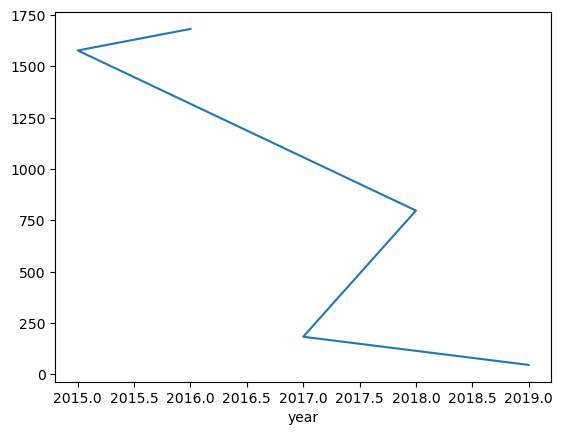

In [144]:
year_top_inv.plot()


In [50]:
round(df['Amount cr'].sum(),2)

506264.75

In [51]:
df.groupby('Startup')['Amount cr'].sum().sum()#total amount funding

506264.75263307994

In [145]:
df['Startup'].nunique#total unique startups

<bound method IndexOpsMixin.nunique of SN
1                              BYJUS
2                             SHUTTL
3                          MAMAEARTH
4       HTTPS://WWW.WEALTHBUCKET.IN/
5                             FASHOR
                    ...             
2869                          TRACXN
2870                            DAZO
2871                        TRADELAB
2872                          PIQUBE
2873                 TRAVEL TRIANGLE
Name: Startup, Length: 2840, dtype: object>

In [53]:
df

,Date,Startup,type,SubVertical,city,Investors Name,investment type,Amount cr,year
SN,,,,,,,,,
1,2020-09-01,BYJUS,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,2800.000000,2020.0
2,NaT,SHUTTL,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,112.677516,NaN
3,2020-09-01,MAMAEARTH,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,257.024040,2020.0
4,2020-02-01,HTTPS://WWW.WEALTHBUCKET.IN/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,42.000000,2020.0
5,2020-02-01,FASHOR,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,25.200000,2020.0
...,...,...,...,...,...,...,...,...,...
2869,NaT,TRACXN,Startup Analytics platform,Unknown,Bangalore,SAIF Partners,Private Equity,49.000000,NaN
2870,NaT,DAZO,Mobile Food Ordering app,Unknown,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000,NaN
2871,NaT,TRADELAB,Financial Markets Software,Unknown,Bangalore,Rainmatter,Seed Funding,5.600000,NaN


### OVERALL ANALYSIS

In [54]:
df.groupby('Startup')['Amount cr'].sum().mean()

231.2767257346185

In [55]:
df.groupby('Startup')['Amount cr'].sum().max()

66635.8

In [56]:
df[df['Startup']=='Flipkart']

,Date,Startup,type,SubVertical,city,Investors Name,investment type,Amount cr,year
SN,,,,,,,,,


In [57]:
df.groupby('Startup')['Amount cr'].sum().sort_values(ascending=False).iloc[0]

66635.8

In [58]:
df.groupby('Startup')['Amount cr'].sum().sort_values(ascending=False).index[0]

'FLIPKART'

In [59]:
df

,Date,Startup,type,SubVertical,city,Investors Name,investment type,Amount cr,year
SN,,,,,,,,,
1,2020-09-01,BYJUS,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,2800.000000,2020.0
2,NaT,SHUTTL,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,112.677516,NaN
3,2020-09-01,MAMAEARTH,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,257.024040,2020.0
4,2020-02-01,HTTPS://WWW.WEALTHBUCKET.IN/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,42.000000,2020.0
5,2020-02-01,FASHOR,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,25.200000,2020.0
...,...,...,...,...,...,...,...,...,...
2869,NaT,TRACXN,Startup Analytics platform,Unknown,Bangalore,SAIF Partners,Private Equity,49.000000,NaN
2870,NaT,DAZO,Mobile Food Ordering app,Unknown,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000,NaN
2871,NaT,TRADELAB,Financial Markets Software,Unknown,Bangalore,Rainmatter,Seed Funding,5.600000,NaN


In [60]:
df['mont']=df['Date'].dt.month

#### STARTUPS RISE OR FALL ACCORDING TO YEAR/MONTH

In [148]:
temp=df.groupby(['year','mont'])['Startup'].count()#year,month groupby is same year is happend then make groups acc to months and give count of startup in each month

In [147]:
temp_df=temp.reset_index()#make it a df

In [63]:
temp_df['year']=temp_df['year'].astype('int')
temp_df['mont']=temp_df['mont'].astype('int')

In [64]:
temp_df['x axis']=temp_df['year'].astype('str')+'/'+temp_df['mont'].astype('str')#making new col for x,y plot

In [65]:
chart_values=temp_df[['x axis','Startup']]

<Axes: >

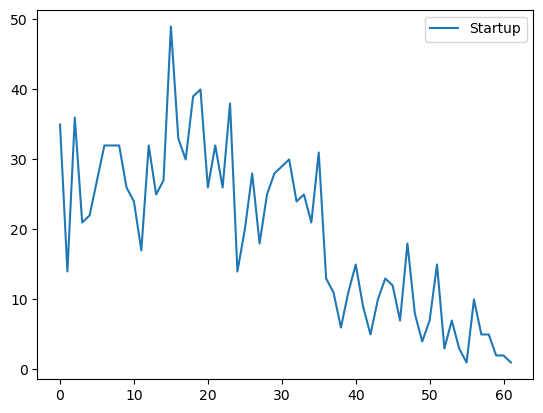

In [66]:
chart_values.plot()

In [67]:
temp_f=df.groupby(['year','mont'])['Amount cr'].sum()

In [68]:
temp_f=temp_f.reset_index()

In [149]:
temp_f['year']=temp_f['year'].astype('int')#conversion for making int to remove non needed .0
temp_f['mont']=temp_f['mont'].astype('int')

In [70]:
temp_f

,year,mont,Amount cr
0,2015,1,8950.90000
1,2015,2,2659.45400
2,2015,3,3242.33000
3,2015,4,3286.43000
4,2015,5,1387.89000
...,...,...,...
57,2019,11,1957.20000
58,2019,12,2093.00000
59,2020,2,67.20000
60,2020,9,3057.02404


In [150]:
temp_f['x axis']=temp_f['year'].astype('str')+'/'+temp_f['mont'].astype('str')#making it str for adding with '/' and making new col

In [72]:

chart_values2=temp_f[['x axis','Amount cr']]

<Axes: >

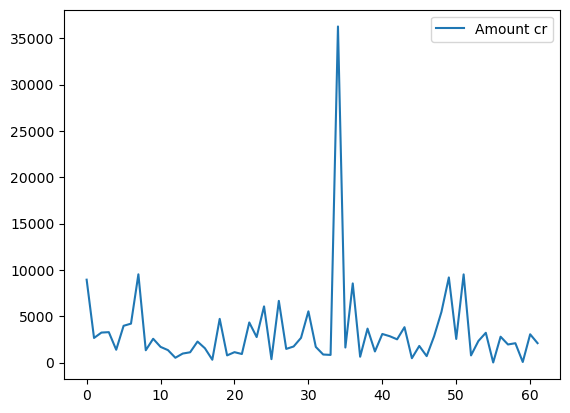

In [73]:
chart_values2.plot()

#### STARTUP ANALYSIS

In [151]:
df[df['Startup'].str.contains('BYJU')]['Amount cr'].sum()#TOTAL AMOUNT FUNDING OF SINGLE STARTUP

7350.0

In [75]:
df

,Date,Startup,type,SubVertical,city,Investors Name,investment type,Amount cr,year,mont
SN,,,,,,,,,,
1,2020-09-01,BYJUS,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,2800.000000,2020.0,9.0
2,NaT,SHUTTL,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,112.677516,NaN,NaN
3,2020-09-01,MAMAEARTH,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,257.024040,2020.0,9.0
4,2020-02-01,HTTPS://WWW.WEALTHBUCKET.IN/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,42.000000,2020.0,2.0
5,2020-02-01,FASHOR,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,25.200000,2020.0,2.0
...,...,...,...,...,...,...,...,...,...,...
2869,NaT,TRACXN,Startup Analytics platform,Unknown,Bangalore,SAIF Partners,Private Equity,49.000000,NaN,NaN
2870,NaT,DAZO,Mobile Food Ordering app,Unknown,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000,NaN,NaN
2871,NaT,TRADELAB,Financial Markets Software,Unknown,Bangalore,Rainmatter,Seed Funding,5.600000,NaN,NaN


In [76]:
df[df['Startup'].str.contains('BYJU')]['city']

SN
1       Bengaluru
68      Bengaluru
713     Bangalore
984     Bangalore
1165    Bangalore
1357    Bangalore
1881    Bangalore
Name: city, dtype: object

In [87]:
df

,Date,Startup,type,SubVertical,city,Investors Name,investment type,Amount cr,year,mont
SN,,,,,,,,,,
1,2020-09-01,BYJUS,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,2800.000000,2020.0,9.0
2,NaT,SHUTTL,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,112.677516,NaN,NaN
3,2020-09-01,MAMAEARTH,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,257.024040,2020.0,9.0
4,2020-02-01,HTTPS://WWW.WEALTHBUCKET.IN/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,42.000000,2020.0,2.0
5,2020-02-01,FASHOR,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,25.200000,2020.0,2.0
...,...,...,...,...,...,...,...,...,...,...
2869,NaT,TRACXN,Startup Analytics platform,Unknown,Bangalore,SAIF Partners,Private Equity,49.000000,NaN,NaN
2870,NaT,DAZO,Mobile Food Ordering app,Unknown,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000,NaN,NaN
2871,NaT,TRADELAB,Financial Markets Software,Unknown,Bangalore,Rainmatter,Seed Funding,5.600000,NaN,NaN


In [127]:
VAL

Startup
BYJUS    Tiger Global Management,Qatar Investment Autho...
Name: Investors Name, dtype: object

In [85]:
df[df['Startup']=='1CROWD']

,Date,Startup,type,SubVertical,city,Investors Name,investment type,Amount cr,year,mont
SN,,,,,,,,,,
1008,2017-09-02,1CROWD,Finance,Startup Crowd-funding platform,Mumbai,Ganesh Natarajan,Seed Funding,0.0,2017.0,9.0


In [153]:
date_startup=df[df['Startup'].str.contains('BYJU')]['Date'].dropna()#NULL DATES ARE DROPPED

In [140]:
for i in date_startup:
    i=datetime(i)
    st.markdown(f"**🚀 Startup Date:** {i.strftime('%B %d, %Y')}")
    print(i)

2020-09-01 00:00:00
2019-10-07 00:00:00
2016-09-09 00:00:00
